<a href="https://colab.research.google.com/github/kazukiminemura/rock_paper_scissors_colab/blob/main/rock_paper_scissors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# rock paper scissors model with tensorflow-v2

!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE
!ls -a datasets

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (3/3), done.
.  ..  choki  gu  pa


In [4]:
!ls datasets -a

.  ..  choki  gu  pa


In [5]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


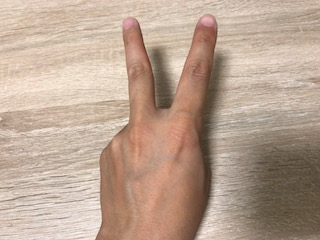

In [6]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [7]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (49.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 156210 files and directories currently instal

In [8]:
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [9]:
dataset_original_dir = "datasets"
dataset_root_dir = "target_datasets"

In [10]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-02 14:14:23--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-02 14:14:23 (33.0 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [11]:
import split_train_val

In [12]:
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67)

datasets/gu copy is done
datasets/pa copy is done
datasets/choki copy is done
processing is done


In [13]:
!rm -rf target_datasets/train/.git target_datasets/val/.git
!tree -d target_datasets -a

target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [14]:
train_dir = "target_datasets/train"
val_dir = "target_datasets/val"

In [15]:
import os
import sys
import shutil

In [16]:
backup_dir ="./model"

In [17]:
labels = [d for d in os.listdir(dataset_original_dir)
  if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)
os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt', 'w') as f:
  for label in labels:
    f.write(label + "\n")

NUM_CLASSES = len(labels)
print(f"class number={str(NUM_CLASSES)}")

class number=3


In [18]:
!cat ./model/labels.txt
!ls ./model

choki
gu
pa
labels.txt


In [19]:
### create AI model ###

In [20]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
labels = []
with open(backup_dir + '/labels.txt', 'r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)
NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [42]:
# hyper-parameters
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 8

In [24]:
# dataset preprocess
IMAGE_SIZE = 64
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [25]:
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)
validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

!ls target_datasets

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.
train  val


In [26]:
# check iterated data
(image_data, label_data) = train_data.next()
print(image_data.shape)
print(label_data.shape)
print(label_data)

(8, 64, 64, 3)
(8, 3)
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


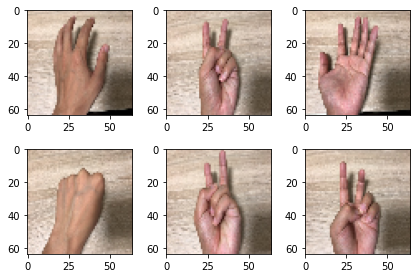

In [27]:
import matplotlib.pyplot as plt
image_numb = 6
for i in range(image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str())
  plt.imshow(image_data[i])

In [31]:
# Define AI topology

### MINIST ####
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(NUM_CLASSES))
# model.add(Activation('softmax'))

# opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
# model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])





In [46]:
### EfficientnNet ####
import tensorflow_hub as hub
feature_extractor_url = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1" #@param {type:"string"}

feature_extractor_layer = hub.KerasLayer(feature_extractor_url, 
                                         input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


In [74]:
LEARNING_RATE = 0.01
EPOCHS = 100
feature_extractor_layer.trainable = False
efficientnet_model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')])

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
efficientnet_model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [76]:
# train model
%%time
# history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)
history = efficientnet_model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=2)

Epoch 1/100
14/14 - 9s - loss: 1.0875 - accuracy: 0.3694 - val_loss: 1.0699 - val_accuracy: 0.3929 - 9s/epoch - 652ms/step
Epoch 2/100
14/14 - 1s - loss: 1.0506 - accuracy: 0.4054 - val_loss: 1.0459 - val_accuracy: 0.4286 - 1s/epoch - 103ms/step
Epoch 3/100
14/14 - 1s - loss: 1.0217 - accuracy: 0.4505 - val_loss: 1.0226 - val_accuracy: 0.4464 - 1s/epoch - 104ms/step
Epoch 4/100
14/14 - 1s - loss: 0.9927 - accuracy: 0.5045 - val_loss: 0.9996 - val_accuracy: 0.4821 - 1s/epoch - 100ms/step
Epoch 5/100
14/14 - 1s - loss: 0.9674 - accuracy: 0.5045 - val_loss: 0.9788 - val_accuracy: 0.5000 - 1s/epoch - 103ms/step
Epoch 6/100
14/14 - 1s - loss: 0.9391 - accuracy: 0.6577 - val_loss: 0.9578 - val_accuracy: 0.6964 - 1s/epoch - 103ms/step
Epoch 7/100
14/14 - 1s - loss: 0.9134 - accuracy: 0.7477 - val_loss: 0.9384 - val_accuracy: 0.8036 - 1s/epoch - 103ms/step
Epoch 8/100
14/14 - 1s - loss: 0.8894 - accuracy: 0.8288 - val_loss: 0.9188 - val_accuracy: 0.8750 - 1s/epoch - 99ms/step
Epoch 9/100
14/14

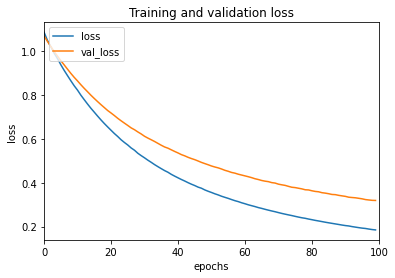

In [77]:
# visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

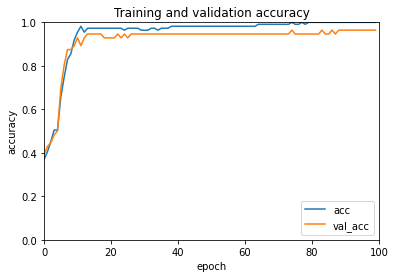

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

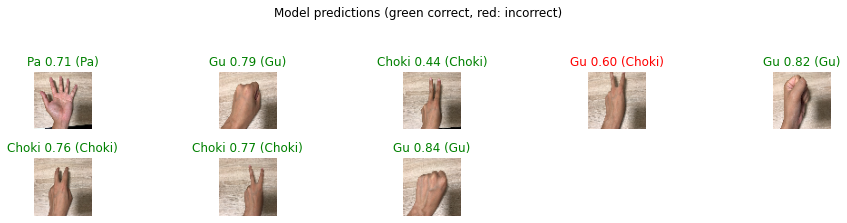

In [79]:
# model evaluation
import PIL.Image as Image

class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = True
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
(validation_image_batch, validation_label_batch) = validation_data.next()

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]

# Returns the indices of the amximum values along a given axis
predicted_batch = efficientnet_model.predict(validation_image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
# Return the maximum values along a give axis
predicted_score = np.max(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=.5)

# Display the classfication results
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # convert the range from -1 to 1to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255, np.int32))

  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + f'{predicted_score[n]: .2f} ({validation_label[n]})', color=color)
  plt.axis('off')
_ = plt.suptitle('Model predictions (green correct, red: incorrect)')

[[11.  7.  4.]
 [ 3.  7.  7.]
 [ 6.  4.  7.]]


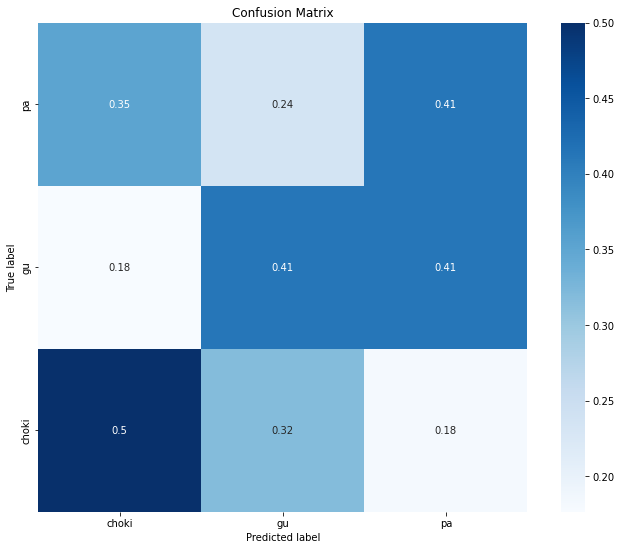

In [83]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.suffle = False
validation_data.batch_size = 1

# retrieve fth first batch from the validation data
# (validation_image_batch, validation_label_batch) = validation_data.next()
# for validation_image_batch, validation_label_batch in validation_data:
#   break

predicted = efficientnet_model.predict(validation_data, steps=validation_data.__len__())
predicrted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
cm = confusion_matrix(validation_data.classes, predicrted_classes) # counts
print(cm.astype('float'))
# print(cm.sum(axis=-1))
# print(cm.sum(axis=-1)[:, np.newaxis])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize

plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()